In [261]:
import pandas as pd
import numpy as np

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [268]:
# Create DataFrame here.
tr_df = pd.read_csv("./data/newark_tree_data.csv")

In [269]:
# Display the first few rows of the DataFrame here.
tr_df.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [270]:
# How many columns does the DataFrame contain?
len(tr_df.columns)
# 54 columns

54

In [271]:
# What attributes (columns) does this DataFrame contain?
tr_df.columns

Index(['ID', 'ON', 'AREA', 'ADDRESS', 'STREET', 'SITE', 'SIDE', 'ASSIGNED',
       'COMMON', 'BOTANICAL', 'CULTIVAR', 'DBH', 'REMOVAL', 'STEMS', 'COND',
       'MAINTPRIM', 'OBSERVE', 'INSPECT', 'LOCATION', 'NOTES', 'DATE', 'TIME',
       'STAFF', 'XCOORD', 'YCOORD', 'FAILURE', 'LIKELIHOOD', 'TARGET',
       'CONSEQ', 'RISK', 'UNIQUEID', 'EDITTIME', 'SPREAD', 'HEIGHT',
       'CLEARANCE', 'DECAYCL', 'DECAYT', 'DECAYRF', 'DAMC', 'DAMT', 'DAMRF',
       'CAVITYCL', 'CAVITYT', 'CAVITYRF', 'IMPROPMULC', 'IMPROPPRUN',
       'NUTRIENTD', 'PEST', 'GIRDLING', 'STRESS', 'OHUTILITY', 'TOP_HEIGHT',
       'CROWN_M', 'CROWN_DIE'],
      dtype='object')

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [336]:
# Create the new DataFrame here
tr_df = tr_df.set_index(tr_df['ID'])
tr_df = tr_df[[ 'UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT']]


In [337]:
# Display the first few rows of the new DataFrame here.
tr_df.head()

,UNIQUEID,COMMON,BOTANICAL,COND,RISK,HEIGHT
ID,,,,,,
11.0,LM 20150929141218,"arborvitae, eastern",Thuja occidentalis,Good,Low,40
12.0,LM 20150929141418,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,40
13.0,LM 20150929141844,"pine, eastern white",Pinus strobus,Good,Low,54
14.0,LM 20150929142424,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,56
15.0,LM 20150929143018,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [338]:
# How many rows does your DataFrame contain.
tr_df.shape
# 4193 rows

(4193, 6)

Let's look at the distribution of data for the HEIGHT attribute.

In [339]:
# What is the min height?
tr_df['HEIGHT'].min()

0

In [340]:
# What is the max height?
tr_df['HEIGHT'].max()

140

In [341]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
tr_df['HEIGHT'].describe()

count    4193.000000
mean       55.311472
std        36.293489
min         0.000000
25%        23.000000
50%        50.000000
75%        86.000000
max       140.000000
Name: HEIGHT, dtype: float64

# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [342]:
# Apply magic command to display matplotlib images inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12669fa90>]],
      dtype=object)

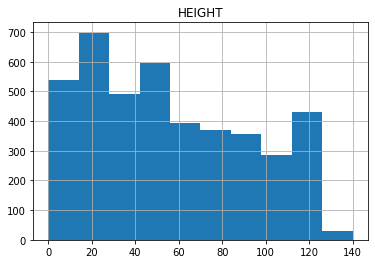

In [343]:
# Create a histogram using the HEIGHT attribute here
tr_df.hist('HEIGHT')

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [344]:
# How many entries are stumps

# 'stump' is located in the 'COMMON' solumn
s = tr_df[tr_df['BOTANICAL'].str.contains("stump")].count()["UNIQUEID"]
s

100

In [345]:
# How many entries are vacant sites
# 'vacant site' is located in the 'COMMON' solumn
v = tr_df[tr_df['BOTANICAL'].str.contains("vacant site")].count()["UNIQUEID"]
v

6

In [346]:
# Do these number add up?
total = s + v
total

106

# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [347]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
cond_tr = tr_df['COND'].value_counts()
cond_tr

Fair         1598
Good         1168
Poor          402
Very Good     381
Dead          218
Excellent     163
Very Poor      83
Critical       74
Name: COND, dtype: int64

In [348]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.

cond_tr = cond_tr.reindex(["Excellent", "Very Good", "Good", "Fair", "Poor", "Very Poor", "Critical", "Dead"])


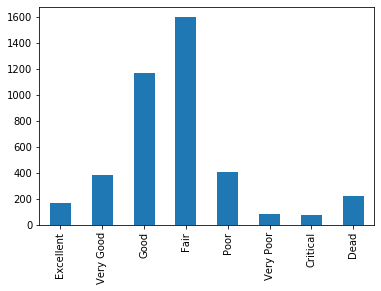

In [349]:
# Plot the Series here
cond_tr.plot.bar(x = "COND")

In [350]:
# How many entries have missing values for the COND attribute? Why are these values missing?
tr_df['UNIQUEID'].count() - tr_df["COND"].count()
# These values are missing because there are 100 stumps and 6 vacant sites.

106

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [351]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
risk_tr = tr_df.groupby('RISK').count()['UNIQUEID']
risk_tr

RISK
High          13
Low         3833
Moderate     241
Name: UNIQUEID, dtype: int64

In [352]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes
#according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High
colors = ['Green', 'Orange', 'Yellow']

([<matplotlib.patches.Wedge at 0x126dcc1d0>,
 [Text(1.0999450792761147, 0.010991932326113531, ''),
  Text(-1.0831495734361938, 0.1917993784270209, ''),
  Text(1.0811789072357736, -0.2026133523449499, '')])

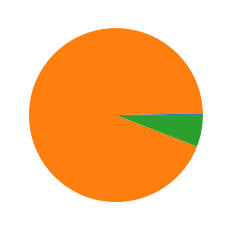

In [353]:
# Plot the pie chart here
plt.pie(risk_tr)
# Assign color

In [354]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
tr_df['UNIQUEID'].count() - tr_df['RISK'].count()
# These values are missing because there are 100 stumps and 6 vacant sites.

106

# Indexing

In [355]:
# Display row by position 1
tr_df.iloc[1]

UNIQUEID       LM 20150929141418
COMMON       arborvitae, eastern
BOTANICAL     Thuja occidentalis
COND                   Very Good
RISK                         Low
HEIGHT                        40
Name: 12.0, dtype: object

In [356]:
# Display row by label 1
tr_df.loc[1]

UNIQUEID        LM 20150929131426
COMMON              locust, black
BOTANICAL    Robinia pseudoacacia
COND                         Poor
RISK                     Moderate
HEIGHT                         43
Name: 1.0, dtype: object